# LOAN APPROVAL DATASET EDA AND PREDICTION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load data**

In [4]:
df1 = pd.read_csv("loan_approval_dataset.csv")

In [6]:
df1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
df1.shape

(4269, 13)

In [10]:
df1.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## EDA 
**Loan status distribution**

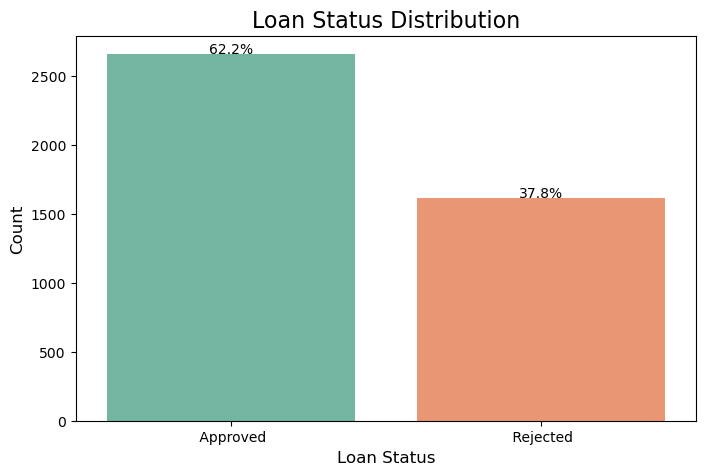

In [13]:

# Plot loan status distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x=' loan_status', palette='Set2')

# Customize the plot
plt.title('Loan Status Distribution', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentage labels on top of bars
total = len(df1)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2.,
        height + 3,
        f'{height/total:.1%}',
        ha='center'
    )

plt.show()

**Income vs loan amount**

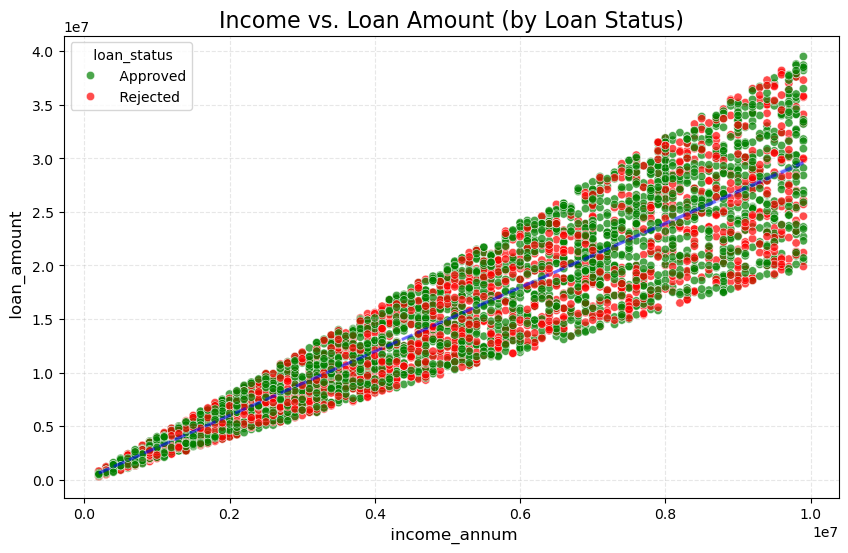

In [16]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df1,
    x=' income_annum',
    y=' loan_amount',
    hue=' loan_status',  # Color by approval status (optional)
    palette={' Approved': 'green', ' Rejected': 'red'},  # Custom colors
    alpha=0.7  # Transparency
)
# Customize the plot
plt.title('Income vs. Loan Amount (by Loan Status)', fontsize=16)
plt.xlabel('Annual Income ', fontsize=12)
plt.ylabel('Loan Amount ', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

#Add a trendline
sns.regplot(
    data=df1,
    x=' income_annum',
    y=' loan_amount',
    scatter=False,
    color='blue',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

plt.show()


**Correlation between numerical variables**
***(income_annum, loan_amount, cibil_score)***

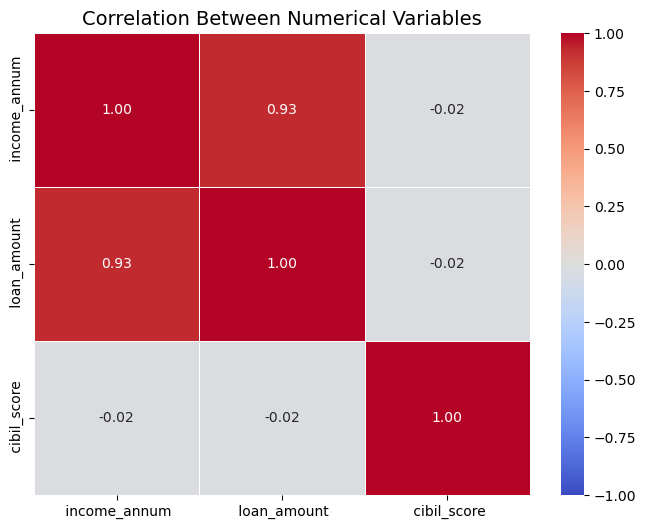

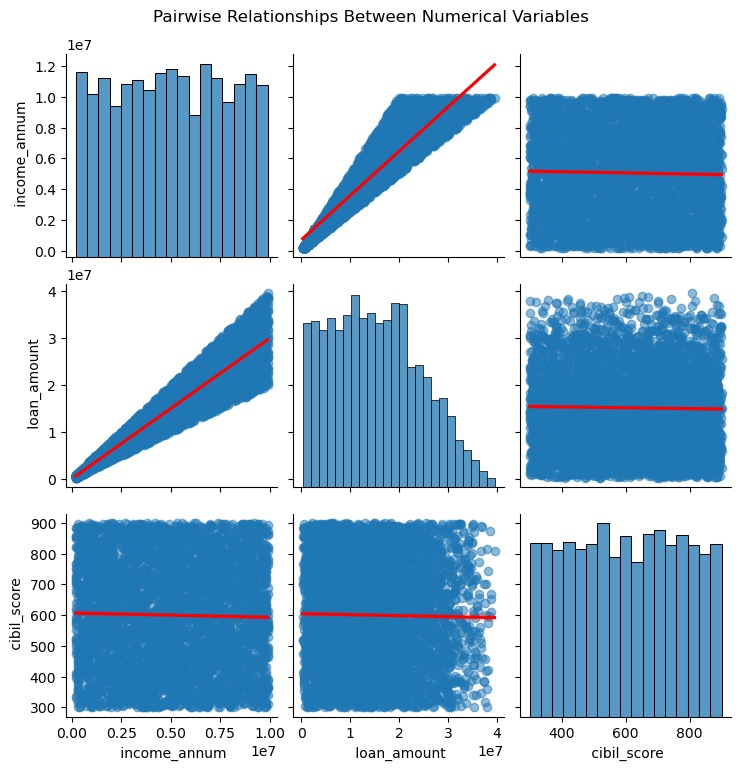

In [19]:


# Select numerical columns
numerical_cols = [' income_annum', ' loan_amount', ' cibil_score']
corr_matrix = df1[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color gradient
    vmin=-1, vmax=1,  # Scale from -1 to 1
    fmt=".2f",  # 2 decimal places
    linewidths=0.5
)
plt.title('Correlation Between Numerical Variables', fontsize=14)
plt.show()

# Pair plot with regression lines
sns.pairplot(
    df1[numerical_cols],
    kind='reg',  # Add regression lines
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}}
)
plt.suptitle('Pairwise Relationships Between Numerical Variables', y=1.02)
plt.show()

## Drop features that are not essential in prediction

In [22]:
df2 = df1.drop(['loan_id', ' no_of_dependents', ' education', ' self_employed'], axis= "columns")

In [24]:
df2.head()

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Feature engineering

**Add a column** ***" total assets"***

In [28]:
df2["total_assets"] = df2[" residential_assets_value"] + df2[" commercial_assets_value"] + df2[" luxury_assets_value"] + df2[" bank_asset_value"]

In [30]:
df2.shape

(4269, 10)

**Drop** ***"commercial assets", "luxury assets", "residential and bank asset values"***

In [33]:
df3 = df2.drop([" commercial_assets_value", " luxury_assets_value", " residential_assets_value", " bank_asset_value"], axis = "columns")
df3.head()

,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets
0,9600000,29900000,12,778,Approved,50700000
1,4100000,12200000,8,417,Rejected,17000000
2,9100000,29700000,20,506,Rejected,57700000
3,8200000,30700000,8,467,Rejected,52700000
4,9800000,24200000,20,382,Rejected,55000000


**Use Label Encoding to convert** ***"loan status"*** **to a numerical value**

In [36]:
from sklearn.preprocessing import LabelEncoder

#Initialize encoder
le = LabelEncoder()

#Fit and transform 
df3["new_loan_status"] = le.fit_transform(df3[" loan_status"])

In [38]:
df4 =df3.drop([" loan_status"], axis = "columns")
df4.head()

,income_annum,loan_amount,loan_term,cibil_score,total_assets,new_loan_status
0,9600000,29900000,12,778,50700000,0
1,4100000,12200000,8,417,17000000,1
2,9100000,29700000,20,506,57700000,1
3,8200000,30700000,8,467,52700000,1
4,9800000,24200000,20,382,55000000,1


### NOW, TRAIN THE MODEL

In [41]:
df4.isnull().sum()

 income_annum      0
 loan_amount       0
 loan_term         0
 cibil_score       0
total_assets       0
new_loan_status    0
dtype: int64

In [43]:
X = df4.drop(["new_loan_status"], axis= "columns")
X.head(3)

,income_annum,loan_amount,loan_term,cibil_score,total_assets
0,9600000,29900000,12,778,50700000
1,4100000,12200000,8,417,17000000
2,9100000,29700000,20,506,57700000


In [45]:
X.shape

(4269, 5)

In [47]:
y = df4.new_loan_status
y.head(3)

0    0
1    1
2    1
Name: new_loan_status, dtype: int32

In [49]:
len(y)

4269

**Train test split**

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


**Using Logistic Regression**

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       525
           1       0.80      0.63      0.70       329

    accuracy                           0.80       854
   macro avg       0.80      0.77      0.77       854
weighted avg       0.80      0.80      0.79       854



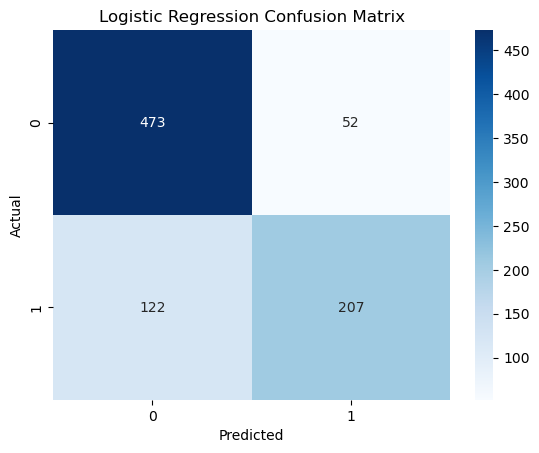

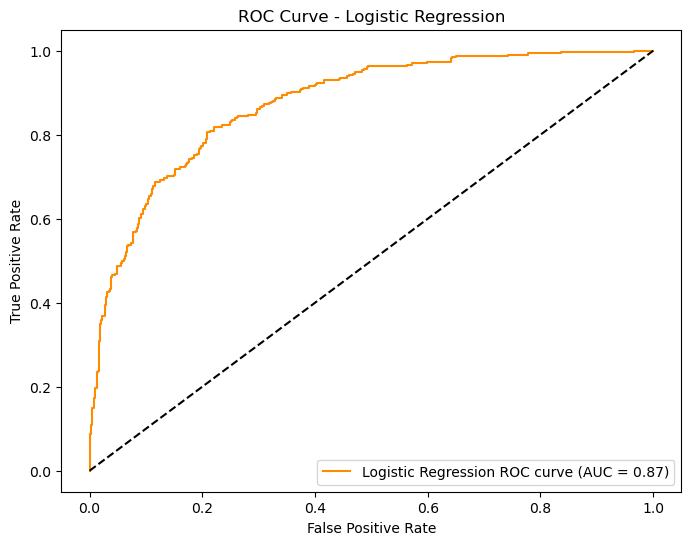

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

# Predictions and evaluation
y_pred_log = model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_prob_log = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression ROC curve (AUC = {roc_auc_log:.2f})', color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**We now try Cross Validation to get the best model**

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC  

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
}
# Evaluate each model using 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.3f} accuracy (±{scores.std():.3f})")

Logistic Regression: 0.770 accuracy (±0.043)
Random Forest: 0.985 accuracy (±0.001)
SVM: 0.622 accuracy (±0.000)


**RANDOM FOREST IS THE BEST MODEL!!!**

**Using Random Forest to train my model again(no cross validation this time)**

In [64]:
best_rf = RandomForestClassifier(
    n_estimators=200,       # Random best params 
    max_depth=20,
    min_samples_split=5,
    random_state=42
)

# Train on ALL training data
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

### Make Predictions
**Generate predictions for new/unseen data (X_test)**

In [67]:
# Predict class labels (0=Rejected, 1=Approved)
y_pred = best_rf.predict(X_test)
y_pred


array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

**Evaluating Model Perfomance**

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba):.3f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       525
           1       0.99      0.97      0.98       329

    accuracy                           0.98       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Confusion Matrix:
[[521   4]
 [  9 320]]

ROC-AUC Score: 0.998


Save the model for deployment

In [179]:
import joblib

# Save the model
joblib.dump(best_rf, 'random_forest_loan_predictor.pkl')

# Load later for predictions
loaded_model = joblib.load('random_forest_loan_predictor.pkl')
